# 热传导方程
参考网址：https://www.bilibili.com/video/BV1q4411p7NX/?spm_id_from=333.999.0.0&vd_source=099edd8ba094e7ddc14190b99d15a5fe
偏微分方程
对于每一个时间t，都会输出一个和位置x相关的函数。

![image2.png](../assert/image2.png)

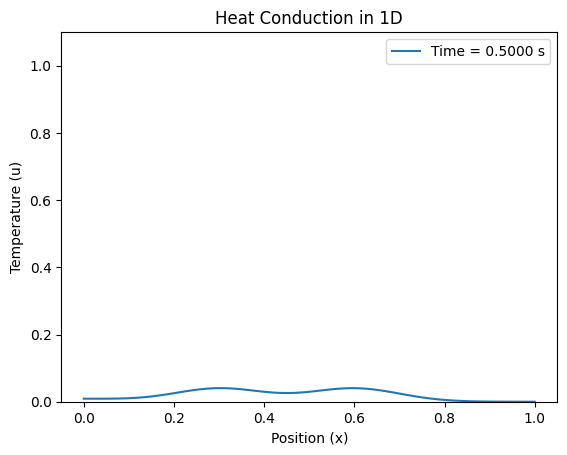

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 物理常数
alpha = 0.01  # 热扩散系数
L = 1.0       # 一维空间的长度
dx = 0.01     # 空间步长
dt = 0.001   # 时间步长，保证满足稳定性条件：dt <= dx^2 / (2 * alpha)

# 初始条件
nx = int(L / dx) + 1  # 空间网格点数
u = np.zeros(nx) # 初始温度分布为0，整个杆子的温度都是0，当然也可以设置为其他的，如sin，其他任意函数等
u[int(0.3 / dx)] = 1  # 在x=0.5处设置初始温度峰值
u[int(0.6 / dx)] = 1  # 在x=0.5处设置初始温度峰值
u[0] = 1


def get_second_derivative(u):
    """计算u对x的二阶偏导数"""
    return ((u[2:] - u[1:-1]) - (u[1:-1] - u[:-2])) / dx**2 # 二阶差分

# 定义热传导函数
def heat_conduction(u, nt):
    """使用显式的有限差分方法模拟热传导"""
    for n in range(nt):
        u_new = u.copy()  # 创建一个新的数组来存储更新后的温度
        u_new[1:-1] = u[1:-1] + alpha * dt * get_second_derivative(u)
        # 应用绝热边界条件，防止边界点温度不变的情况发生
        u_new[0] = u_new[1]
        u_new[-1] = u_new[-2]
        u = u_new  # 更新温度分布
    return u

# 模拟一段时间后的温度分布
nt = 500  # 时间步数
u_final = heat_conduction(u, nt)

# 绘图
x = np.linspace(0, L, nx)
plt.plot(x, u_final, label=f'Time = {nt * dt:.4f} s')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (u)')
plt.title('Heat Conduction in 1D')
plt.ylim(0, 1.1)
plt.legend()
plt.show()


## 动图版本

MovieWriter imagemagick unavailable; using Pillow instead.


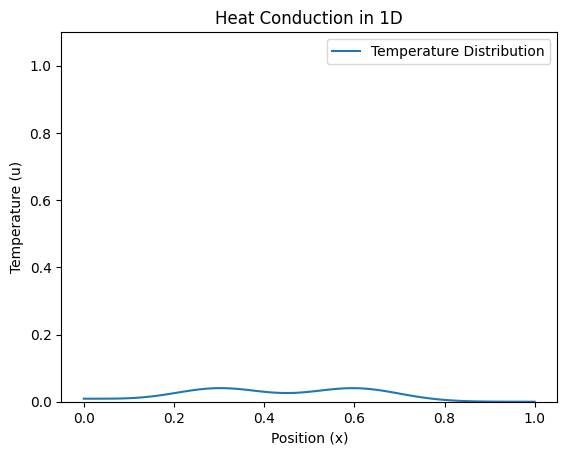

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 物理常数
alpha = 0.01  # 热扩散系数
L = 1.0       # 一维空间的长度
dx = 0.01     # 空间步长
dt = 0.001   # 时间步长，保证满足稳定性条件：dt <= dx^2 / (2 * alpha)

# 初始条件
nx = int(L / dx) + 1  # 空间网格点数
u = np.zeros(nx)      # 初始温度分布
# u[int(0.5 / dx)] = 1  # 在x=0.5处设置初始温度峰值
u[int(0.3 / dx)] = 1  # 在x=0.3处设置初始温度峰值
u[int(0.6 / dx)] = 1  # 在x=0.6处设置初始温度峰值
u[0] = 1
# # 设置初始条件为sin函数
# u = np.sin(np.pi * 4 * np.linspace(0, L, nx)) + 1
# u /= 2

# 定义热传导函数
def heat_conduction(u, nt):
    """使用显式的有限差分方法模拟热传导"""
    u_history = [u.copy()]  # 存储温度分布的历史记录
    for n in range(nt):
        u_new = u.copy()  # 创建一个新的数组来存储更新后的温度
        for i in range(1, nx - 1):  # 遍历空间中的每个内部点
            u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2 * u[i] + u[i-1])
        # 应用绝热边界条件，防止边界点温度不变的情况发生
        u_new[0] = u_new[1]
        u_new[-1] = u_new[-2]
        u = u_new  # 更新温度分布
        u_history.append(u.copy())  # 保存当前温度分布
    return u_history

# 模拟一段时间后的温度分布
nt = 500  # 时间步数
u_history = heat_conduction(u, nt)

# 动图设置
fig, ax = plt.subplots()
x = np.linspace(0, L, nx)
line, = ax.plot(x, u_history[0], label='Temperature Distribution')
ax.set_ylim(0, 1.1)  # 设置y轴范围
ax.set_xlabel('Position (x)')
ax.set_ylabel('Temperature (u)')
ax.set_title('Heat Conduction in 1D')
ax.legend()

# 更新函数
def update(frame):
    line.set_ydata(u_history[frame])
    return line,

# 创建动图
ani = FuncAnimation(fig, update, frames=len(u_history), blit=True, interval=20)

# 保存动图
ani.save('heat_conduction.gif', writer='imagemagick', fps=30)

plt.show()


## 使用上下文管理器封装动图

MovieWriter imagemagick unavailable; using Pillow instead.


start draw animation, len datas: 501


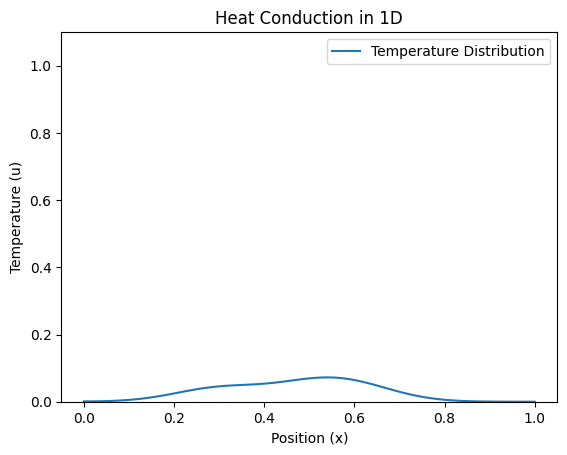

In [ ]:
from contextlib import contextmanager
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def draw(datas):
    fig, ax = plt.subplots()
    x = np.linspace(0, L, nx)
    line, = ax.plot(x, datas[0], label='Temperature Distribution') # 注意这里的line后面要加逗号，这样拿到的才不是列表，而是一个对象
    ax.set_ylim(0, 1.1)  # 设置y轴范围
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Temperature (u)')
    ax.set_title('Heat Conduction in 1D')
    ax.legend()

    # 更新函数
    def update_func(frame):
        line.set_ydata(datas[frame])
        return line,  # 注意这里返回的是一个元组,不这样写就会报错

    return fig, update_func


@contextmanager
def drawAnimation(draw_func):
    try:
        datas = []
        yield datas
    finally:
        print('start draw animation, len datas:', len(datas))
        fig, update_func = draw_func(datas)
        # 创建动图
        ani = FuncAnimation(fig, update_func, frames=len(datas), blit=True, interval=20)
        # 保存动图
        ani.save('heat_conduction.gif', writer='imagemagick', fps=30)
        plt.show()

# 通过上下文管理器封装之后，我们只需要实现drwa函数即可
# 在drwa函数中，实现第一幅图的绘制，在函数里面再实现一个update函数即可。
# 为了提高效率，update通常是通过句柄来更新数据，而不是再次绘制一次图。




import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 物理常数
alpha = 0.01  # 热扩散系数
L = 1.0       # 一维空间的长度
dx = 0.01     # 空间步长
dt = 0.001   # 时间步长，保证满足稳定性条件：dt <= dx^2 / (2 * alpha)

# 初始条件
nx = int(L / dx) + 1  # 空间网格点数
u = np.zeros(nx)      # 初始温度分布
u[int(0.5 / dx)] = 1  # 在x=0.5处设置初始温度峰值
u[int(0.3 / dx)] = 1  # 在x=0.3处设置初始温度峰值
u[int(0.6 / dx)] = 1  # 在x=0.6处设置初始温度峰值
# u[0] = 1
# # 设置初始条件为sin函数
# u = np.sin(np.pi * 4 * np.linspace(0, L, nx)) + 1
# u /= 2

# 定义热传导函数
def heat_conduction(u, nt):
    """使用显式的有限差分方法模拟热传导"""
    with drawAnimation(draw) as u_history:
        # u_history = [u.copy()]  # 存储温度分布的历史记录
        u_history.append(u.copy())
        for n in range(nt):
            u_new = u.copy()  # 创建一个新的数组来存储更新后的温度
            for i in range(1, nx - 1):  # 遍历空间中的每个内部点
                u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2 * u[i] + u[i-1])
            # 应用绝热边界条件，防止边界点温度不变的情况发生
            u_new[0] = u_new[1]
            u_new[-1] = u_new[-2]
            u = u_new  # 更新温度分布
            u_history.append(u.copy())  # 保存当前温度分布
    return u_history

# 模拟一段时间后的温度分布
nt = 500  # 时间步数
u_history = heat_conduction(u, nt)

